In [1]:
import pandas as pd



In [3]:
# Charger les fichiers CSV
data_india = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')
data_rate = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')

In [4]:
# Aperçu des données
print(data_india.head())
print(data_rate.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0 

In [5]:
# Afficher les informations générales
print(data_india.info())
print(data_rate.info())

# Vérifier les colonnes disponibles
print("Colonnes de data_india:", data_india.columns)
print("Colonnes de data_rate:", data_rate.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------             

In [6]:
# Vérifier les valeurs manquantes
print(data_india.isnull().sum())
print(data_rate.isnull().sum())

# Remplissage des valeurs manquantes (si nécessaire)
data_india.fillna(method='ffill', inplace=True)
data_rate.fillna(method='bfill', inplace=True)

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


<ipython-input-6-c5ce23aa4f53>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_india.fillna(method='ffill', inplace=True)
<ipython-input-6-c5ce23aa4f53>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_rate.fillna(method='bfill', inplace=True)


In [7]:
# Résumé statistique
print(data_india.describe())
print(data_rate.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        768.000000         7.680000e+02   
mean                          11.627969         7.494411e+06   
std                           10.566371         8.160679e+06   
min                            0.000000         4.942000e+04   
25%                            4.720000         1.376532e+06   
50%                            8.350000         5.064048e+06   
75%                           15.472500         1.140351e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                768.000000  
mean                                  42.497956  
std                                    7.995346  
min                                   13.330000  
25%                                   37.930000  
50%                                   40.870000  
75%                                   45.362500  
max                    

In [9]:
print(data_rate.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [10]:
data_rate.columns = data_rate.columns.str.strip()


In [11]:
print(data_rate.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


<ipython-input-12-818b3a7bbca4>:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_rate['Date'] = pd.to_datetime(data_rate['Date'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0


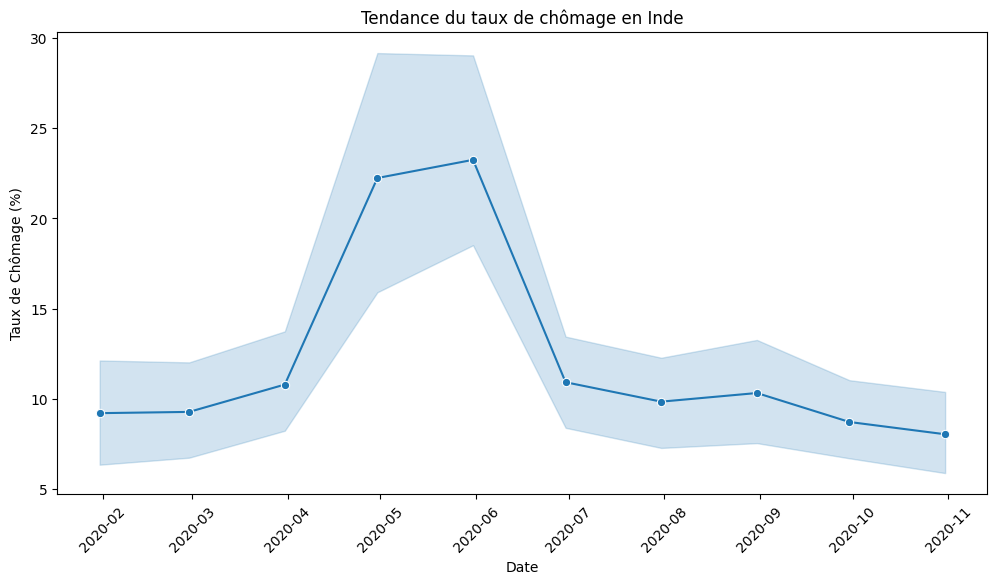

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir 'Date' en datetime si ce n'est pas déjà fait
data_rate['Date'] = pd.to_datetime(data_rate['Date'], errors='coerce')

# Vérifiez les valeurs manquantes
print(data_rate['Date'].isnull().sum())  # Doit être 0

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_rate, x='Date', y='Estimated Unemployment Rate (%)', marker='o')
plt.title("Tendance du taux de chômage en Inde")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Taux de Chômage (%)")
plt.show()


In [14]:
print(data_india.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [15]:
data_india.columns = data_india.columns.str.strip()


In [16]:
region_data = data_india.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()


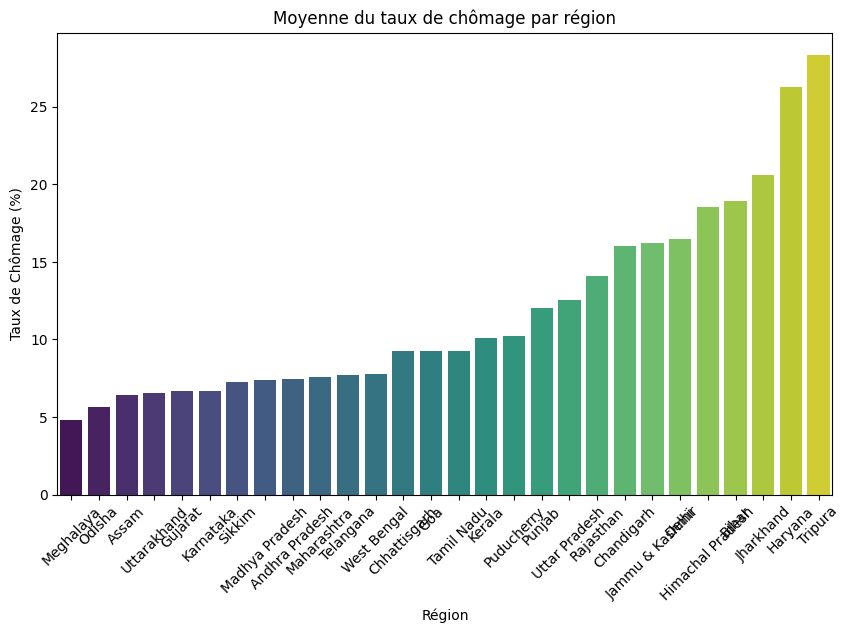

In [19]:
# Moyenne des taux de chômage par région
plt.figure(figsize=(10, 6))
sns.barplot(x=region_data.index, y=region_data.values, palette='viridis')
plt.title("Moyenne du taux de chômage par région")
plt.xlabel("Région")
plt.ylabel("Taux de Chômage (%)")
plt.xticks(rotation=45)
plt.show()


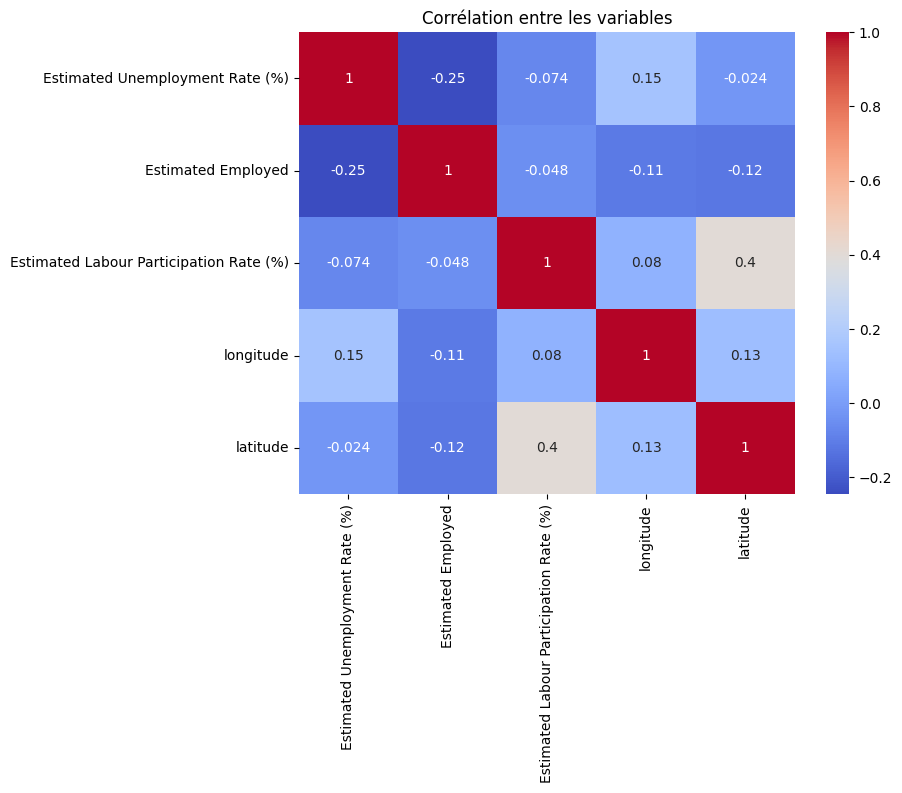

In [21]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data_rate.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables")
plt.show()



In [23]:
print(data_india.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Préparation des données
X = data_india[['Estimated Employed']]  # Remplacez par une colonne pertinente
y = data_india['Estimated Unemployment Rate (%)']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
predictions = model.predict(X_test)

# Évaluation
print("Erreur quadratique moyenne :", mean_squared_error(y_test, predictions))


Erreur quadratique moyenne : 60.720958100198594


In [28]:
# Exporter les données nettoyées
data_rate.to_csv('cleaned_unemployment_rate.csv', index=False)

# Exporter un graphique
plt.savefig('unemployment_trend.png')


<Figure size 640x480 with 0 Axes>